In [74]:
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imghdr

class DoG:
    def __init__(self,file):
        # load a gif image
        if imghdr.what(file) == 'gif':
            gif = cv2.VideoCapture(file)
            ret, self.originalImage = gif.read()
        else:
            self.originalImage = cv2.imread(file)
        
    def DoG_by_OpenCV(self,kernel1,kernel2):
        self.src_gray = cv2.cvtColor(self.originalImage,cv2.COLOR_BGR2GRAY)        
        self.G1_cv = cv2.GaussianBlur(self.src_gray,(kernel1,kernel1),0)
        self.G2_cv = cv2.GaussianBlur(self.src_gray,(kernel2,kernel2),0)
        self.DoG_cv = self.G1_cv.astype(np.float32) - self.G2_cv.astype(np.float32)
        
        self.sigma_1 = 0.3*((kernel1-1)*0.5-1) + 0.8
        self.sigma_2 = 0.3*((kernel2-1)*0.5-1) + 0.8        

    def replicate_boundary(self,r_curr, c_curr,row,col):
        r_temp = r_curr
        c_temp = c_curr                       
        if r_temp<0:
            r_temp +=1
        elif r_temp>=row:
            r_temp -=1

        if c_temp<0:
            c_temp +=1
        elif c_temp>=col:
            c_temp -=1
        return r_temp, c_temp
            
    def get_GaussianBlurred(self,gkernel):
        row, col = self.src_gray.shape
        G = np.zeros((row,col))
        
        for r in range(row):
            for c in range(col):
                for i in range(3):
                    for j in range(3):
                        r_temp, c_temp = self.replicate_boundary(r+i-1,c+j-1,row,col)
                        G[r,c] += self.src_gray[r_temp,c_temp]*gkernel[i,j]

        return G 
        
    def DoG_from_Scratches(self):
        xdir_gauss = cv2.getGaussianKernel(3, .5)
        gkernel1 = np.multiply(xdir_gauss.T, xdir_gauss)
        
        xdir_gauss = cv2.getGaussianKernel(3, 3.0)
        gkernel2 = np.multiply(xdir_gauss.T, xdir_gauss)
        
        self.G1_scratch = self.get_GaussianBlurred(gkernel1)
        self.G2_scratch = self.get_GaussianBlurred(gkernel2)
        self.DoG_scratch = self.G1_scratch-self.G2_scratch
        

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

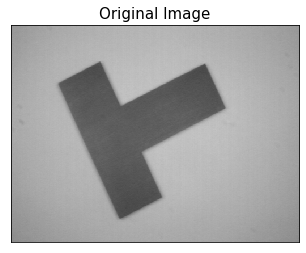

In [76]:
path = os.getcwd()
file = ''.join(path+"/wdg1.gif")
G = DoG(file)
plt.imshow(G.originalImage)
plt.title('Original Image',fontsize=15)
plt.xticks([]), plt.yticks([])

sigma_1= 0.8
sigma_1= 1.1


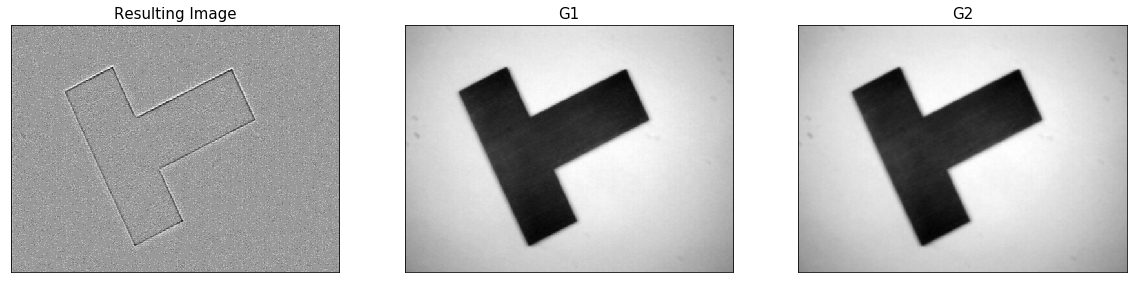

In [77]:
G.DoG_by_OpenCV(3,5)

plt.figure(figsize=(20,6))
plt.subplot(131), plt.imshow(G.DoG_cv,cmap='gray'),plt.title('Resulting Image',fontsize=15)
plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(G.G1_cv, cmap='gray'),plt.title('G1',fontsize=15)
plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(G.G2_cv, cmap='gray'),plt.title('G2',fontsize=15)
plt.xticks([]), plt.yticks([])

print("sigma_1=",G.sigma_1)
print("sigma_1=",G.sigma_2)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

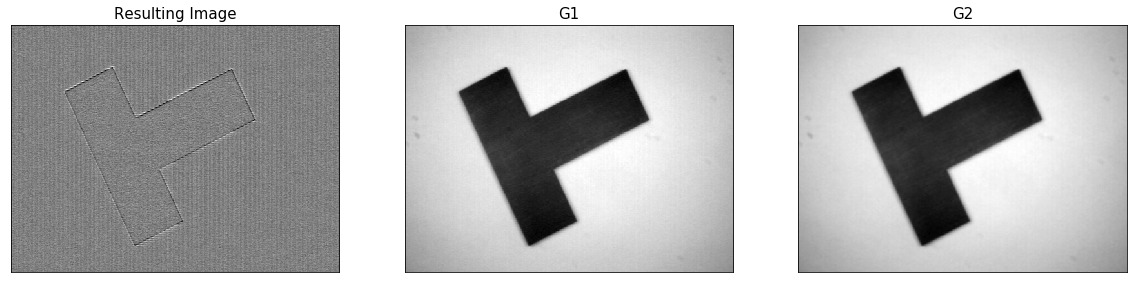

In [78]:
G.DoG_from_Scratches()

plt.figure(figsize=(20,6))
plt.subplot(131), plt.imshow(G.DoG_scratch,cmap='gray'),plt.title('Resulting Image',fontsize=15)
plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(G.G1_scratch, cmap='gray'),plt.title('G1',fontsize=15)
plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(G.G2_scratch, cmap='gray'),plt.title('G2',fontsize=15)
plt.xticks([]), plt.yticks([])